# Lab Sheet 7 (COM3502-4502-6502 Speech Processing)

This lab sheet is part of the lecture COM[3502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level3/com3502.html "Open web page for COM3502 module")-[4502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level4/com4502.html "Open web page for COM4502 module")-[6502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/msc/com6502.html "Open web page for COM4502 module") Speech Processing at the [University of Sheffield](https://www.sheffield.ac.uk/ "Open web page of The University of Sheffield"), Dept. of [Computer Science](https://www.sheffield.ac.uk/dcs "Open web page of Department of Computer Science, University of Sheffield").

It is probably easiest to open this Jupyter Notebook with [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb#recent=true "Open in Google Colab") since GitHub's Viewer does not always show all details correctly. <a href="https://colab.research.google.com/github/sap-shef/SpeechProcesssingLab/blob/main/Lab-Sheets/Lab-Sheet-7.ipynb"><img align="right" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open Notebook in Google Colab" title="Open and Execute the Notebook directly in Google Colaboratory"></a>

Please put questions, comments and correction suggestions in the [Blackboard](https://vle.shef.ac.uk) discussion board or send an email to [s.goetze@sheffield.ac.uk](mailto:s.goetze@sheffield.ac.uk).

In [1]:
# Let's do the ususal necessary and nice-to-have imports
%matplotlib inline
import matplotlib.pyplot as plt  # plotting
import seaborn as sns; sns.set() # styling ((un-)comment if you want)
import numpy as np               # math

# imports we need in addition for this lab sheet
from IPython import display as ipd

## A random Signal

We will deal with random signals in the following. A random signal with a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution), a.k.a. Gaussian distribution, can be generated using `numpy`s function `np.random.normal()`. 

<br>
<a id='task_1'></a>
<div style="border: 2px solid #999; padding: 10px; background: #eee;">
    
**Task 1: Create a random signal**
    
<ul>
<li> 
    Use the function <code>np.random.normal()</code> to create a random signal of $1$ second length.
</li>     
<li> 
    Visualise and listen to the signal.
</li>  
<li> 
    Show the normal distribution by plotting the histogram of the function. The <code>hist()</code> function of <code>matplotlib</code> might be helpful for this.
</li> 
</ul>
</div>

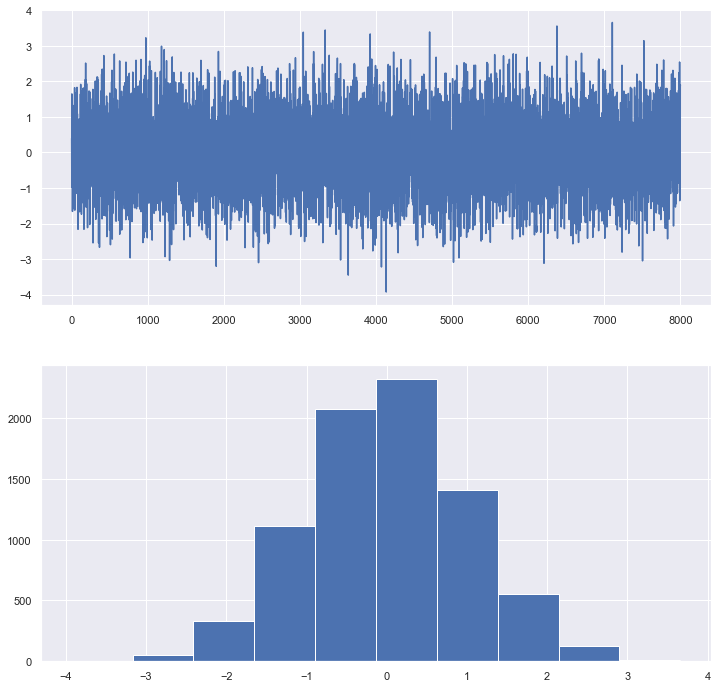

In [32]:
# your code here:

# create a normally distributed random signal of legth 1 second
# ...
fs = 8000
s = np.random.normal(size=fs)

# visualise the signal
# ...
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
plt.plot(s)

# visualise the histogram
# ...
plt.subplot(2,1,2)
plt.hist(s)

# listen to the sound file
# ...
ipd.Audio(s, rate=fs)

## A periodically repeated Random Signal

To add some *structure* to the signal we will generate a periodic random signal in the following by concatenating the same random signal several times.

<br>
<a id='task_2'></a>
<div style="border: 2px solid #999; padding: 10px; background: #eee;">
    
**Task 2: Create a perodic random signal**
    
<ul>
<li> 
    Use the function <code>np.random.normal()</code> to create a random signal of $P=100$ samples length.
</li>     
<li> 
    Create a signal of length $L=8000$ containing $L/P$ repetitions of the the previously generated signal. You can use the function <code>np.tile()</code> to create this longer signal.
</li>
<li> 
    You may want to listen to this signal to <strong>perceive</strong> the periodic structure.
</li>
</ul>
</div>

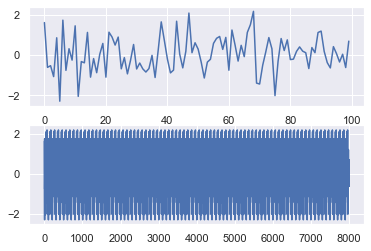

In [129]:
np.random.seed(1) # this ensures that always the same "random" signal is generated

# your code here
# ....
P = 100
L = 8000

d = np.random.normal(size=P)

c = np.tile(d, L//P) # '//' output is int, '/' output is float


plt.subplot(2,1,1)
plt.plot(d)


plt.subplot(2,1,2)
plt.plot(c)

ipd.Audio(c, rate=fs)

## Autocorrelation Sequence, a.k.a. Autocorrelation Function

In the [previous notebook (Lab-Sheet 3)](./Lab-Sheet-3-Solution.ipynb) we calculated the [Correlation](https://en.wikipedia.org/wiki/Correlation_and_dependence) and the correlation coefficient $\hat{r}_{xx}$ as a scalar quantity indicating how correlated two signals (of the same length) are.

Today, we are not only interested in the scalar correlation between two signals $x[k]$ and $y[k]$ but also in the (auto-)correlation between $x[k]$ and $x[k-\kappa]$, the time-shifted version of $x[k]$. This information can be analysed by the [auto-correlation function](https://en.wikipedia.org/wiki/Autocorrelation) (ACF) which characterizes the temporal dependencies within one random signal $x[k]$. 

We define the *autocorrelation function estimate* at a time shift $\kappa$ of the signal $x[k]$ of length $L$ as

\begin{equation}
\hat{r}_{xx}[\kappa] = \frac{1}{L} \sum_{k=1}^{L}x[k]x[k+\kappa]  \tag{1}
\label{eq:AutocorrelationEstFullSum}
\end{equation}

for all values of $\kappa$ from $0$ to $L-1$, i.e., for each $\kappa$ we correlate the non-shifted signal with a signal shifted by $\kappa$ samples.

We observe that the sum in (\ref{eq:AutocorrelationEstFullSum}) is not well defined as  $x[k+\kappa]$ is unknown for $k+\kappa>L$. We have to assume that the signals are zero-padded by as many zeros before and after the actual signal as needed to calculate the sum. We call this *zero-padding*. We will be using the Python's `np.correlate()` function to calculate the correlation. The option `mode='full'` ensures proper automatic zero-padding.


<br>
<a id='task_3'></a>
<div style="border: 2px solid #999; padding: 10px; background: #eee;">
    
**Task 3: Calculate the autocorrelation function for the periodically repeated random signal**
    
<ul>
<li> 
    Calculate the ACF using the <code>np.correlate()</code> function and the parameter <code>mode='full'</code>. Note, that the normalisation by $1/L$ has to be added manually. 
</li>
<li> 
    The resulting ACF vector is of length $2L-1$ ranging from $-(L-1)$ to $(L-1)$. The interesting are is in the middle of the vector, i.e. around $\kappa =0$. Thus, plot the ACF for the samples $-(K-1) \leq \kappa \leq (K-1)$ with $K=250$.
</li>  
</ul>
</div>


15999
498


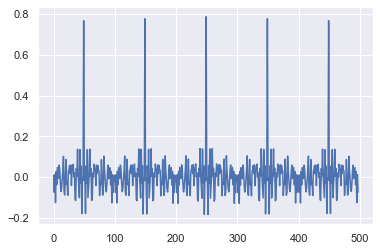

In [142]:
# your code here
# ....
x = c
K = 250
ACF = 1/len(x) * np.correlate(x,x,mode='full')

print(len(ACF))
j = np.argmax(ACF)
ACF = ACF[j-(K-1):j+K-1]
print(len(ACF))
plt.plot(ACF)

## Autocorrelation of a speech segment

<br>
<a id='task_4'></a>
<div style="border: 2px solid #999; padding: 10px; background: #eee;">
    
**Task 4: Calculate the autocorrelation function for a speech signal**
    
<ul>
<li> 
    Download the file <code>https://staffwww.dcs.shef.ac.uk/people/S.Goetze/sound/voiced_unvoiced_e.wav</code> and load it to a variable  <code>s</code>. 
</li>
<li> 
    Plot the ACF for the samples $-(K-1) \leq \kappa \leq (K-1)$ with $K=500$.
</li>  
</ul>
</div>

In [ ]:
# your code here
# ....

## Fundamental Frequency Estimation

With the knowledge from the ACF estimate $\hat{r}_{xx}[\kappa]$, we will now extract the fundamental frequency, a.k.a. pitch frequency, of a speech signal.

<br>
<a id='task_5'></a>
<div style="border: 2px solid #999; padding: 10px; background: #eee;">
    
**Task 5: Calculation of Pitch Frequency**
    
<ul>
<li> 
    Download the file <code>https://staffwww.dcs.shef.ac.uk/people/S.Goetze/sound/voiced_unvoiced_e.wav</code> and load it to a variable  <code>s</code>. 
</li>
<li> 
    Plot the ACF for the samples $-(K-1) \leq \kappa \leq (K-1)$ with $K=500$.
</li>  
</ul>
</div>

In [ ]:
# your code here
# ....

To determine the periodicity of the signal we are interested in the distance of the ACF maxima. Since we know that we always have a maximum at $\kappa=0$ we are interested in identifying the second maximum.

To be more robust in case of mixed (voiced/unvoiced) excitation  signals, we only look in the time shift range which corresponds to sensible frequencies (limited by $f_{min}$ and $f_{max}$ as visualised in orange in the figure below). Typical pitch frequencies are in an range between $f_{min}=50$ Hz and $f_{max}=500$ Hz. With the knowledge that discrete time variables $\kappa$ are related to discrete frequency variables by the sampling frequency $f_s$ we can calculate the *search area* (orange shaded below) between $\kappa_{\mathrm{max}} = \operatorname{round}\left(\frac{f_s}{f_{\mathrm{max}}}\right)$ and $\kappa_{\mathrm{min}} = \operatorname{round}\left(\frac{f_s}{f_{\mathrm{min}}}\right)$.

<img src="autocorrelation_frequencies.svg" align="center"/>


We now want to determine the fundamental frequency of the speech signal $s[k]$ from the ACF we just calculated.

<br>
<a id='task_5'></a>
<div style="border: 2px solid #999; padding: 10px; background: #eee;">
    
**Task 5: Calculation of Pitch Frequency**
    
<ul>
<li> 
    Search for the highest peak in the ACF. The function <code>np.argmax()</code> might be helpful for this.
</li>
<li> 
    Calculate the pitch frequency $f_p=f_s \cdot \kappa_{\mathrm{peak}}$, i.e. $f_p=f_s \cdot \kappa_{0}$.
</li>  
</ul>
</div>

In [ ]:
# your code here
# ....

## Copyright

This notebook is licensed to be used during the lecture COM[3502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level3/com3502.html "Open web page for COM3502 module")-[4502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level4/com4502.html "Open web page for COM4502 module")-[6502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/msc/com6502.html "Open web page for COM4502 module") Speech Processing at the [University of Sheffield](https://www.sheffield.ac.uk/ "Open web page of The University of Sheffield"), Dept. of [Computer Science](https://www.sheffield.ac.uk/dcs "Open web page of Department of Computer Science, University of Sheffield"). Any further use (beyond use for the lecture) is only permitted if agreed with the [module lead](mailto:s.goetze@sheffield.ac.uk). 